<a href="https://colab.research.google.com/github/felipefranca/python-data-visualization-imdb-dataset/blob/main/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Trabalho Final - Visualização de Dados - PUC Minas - Pós Inteligência Artificial
#### Felipe Jonata Oliveira França
#### Link para o download do dataset: https://www.kaggle.com/fabriziocominetti/imdb-data 


Importando as bibliotecas 



In [6]:
import warnings;warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import missingno as msno
from scipy import stats
import numpy as np
import plotly.graph_objects as go
%matplotlib inline
from collections import Counter

## Carregando o dataset e selecionando as colunas


In [7]:
#data = pd.read_csv('title_basics.csv',error_bad_lines=False)
data = pd.read_csv('drive/MyDrive/datasets/title_basics.csv', low_memory=False)

In [8]:
#Limpando a base de valores "na"

df = data[~data.duplicated()]
df.dropna(inplace=True)
df.isna().sum()
data = df
data.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

##Quais são os tipos de títulos mais avaliados no IMDb ?
#### Os tipos de títulos mais recorrentes no IMDb são episódios de TV,filmes e curta-metragem seguidos por vídeos e series.

*   Explicação: Extrair dos dados coletados quais são os tipos de títulos mais avaliados
*   Motivação: Saber quais são os títulos mais avaliados no IMDb
*   Análise/insights: Episódios de TV e Filmes são os tipos mais avaliados


In [9]:
titletype = [i for i in Counter(data.titleType).items()]
x = 'Tipo'
y = 'Totais'
fig = px.bar(x = [i[0] for i in sorted(titletype,key=lambda x: x[1])[::-1][:11]],y = [i[1] for i in sorted(titletype,key=lambda x: x[1])[::-1][:11]],color = [i[0] for i in sorted(titletype,key=lambda x: x[1])[::-1][:11]],template='plotly_dark')
fig.update_layout(xaxis_title = f'{str(x).title()}',yaxis_title = f'{str(y).title()}',title = f'Distribuição Baseada no Tipo de Título')
fig.show()

##Quanto tempo de duração tem os filmes ao longo do tempo ? 

#### A média de tempo de duração dos filmes está entre o intervalo de 50 a 100 minutos como podemos ver no boxplot abaixo. Eliminei os filmes com tempo de duração acima de 300 minutos por se tratar de valores que fogem da média(outliers)


*   Explicação: Extrair dos dados coletados qual a média de duração dos filmes
*   Motivação: Saber quanto tempo em média um filme tem de duração
*   Análise/insights: A média de duração é em torno de 50 a 100 minutos


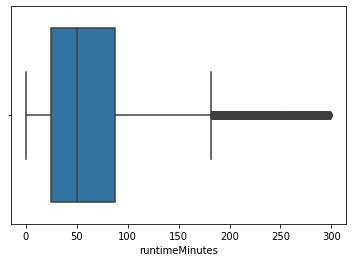

In [10]:
conditionToEndYear = (data['endYear'] != '\\N') & (data['endYear'] != 'NaN') & (data['endYear'] != 'None') & (data['endYear'] != '')
conditionToStartYear = (data['startYear'] != '\\N') & (data['startYear'] != 'NaN') & (data['startYear'] != 'None') & (data['startYear'] != '')
conditionRuntimeMinutes = (data['runtimeMinutes'] != '\\N') & (data['runtimeMinutes'] != 'NaN') & (data['runtimeMinutes'] != 'None') & (data['runtimeMinutes'] != '')
df2 = data[(conditionRuntimeMinutes)].dropna()
df2['runtimeMinutes'] = df2['runtimeMinutes'].astype(int)
conditionToRuntimeMinutes = (df2['runtimeMinutes'] < 300)
df_filtrado = df2[(conditionToRuntimeMinutes)]
sns.boxplot(x='runtimeMinutes', data=df_filtrado)

## Quais são os gêneros com mais avaliações no IMDb ? 
*   Explicação: Analisar quais são os gêneros como mais avaliações 
*   Motivação: Saber quais são os gêneros com mais lançamentos e consequentemente mais avaliações
*   Análise/insights: Drama e cómedia são os que mais foram avaliados, talver por um gosto geral do publico ou pela quantidade de lançamentos 





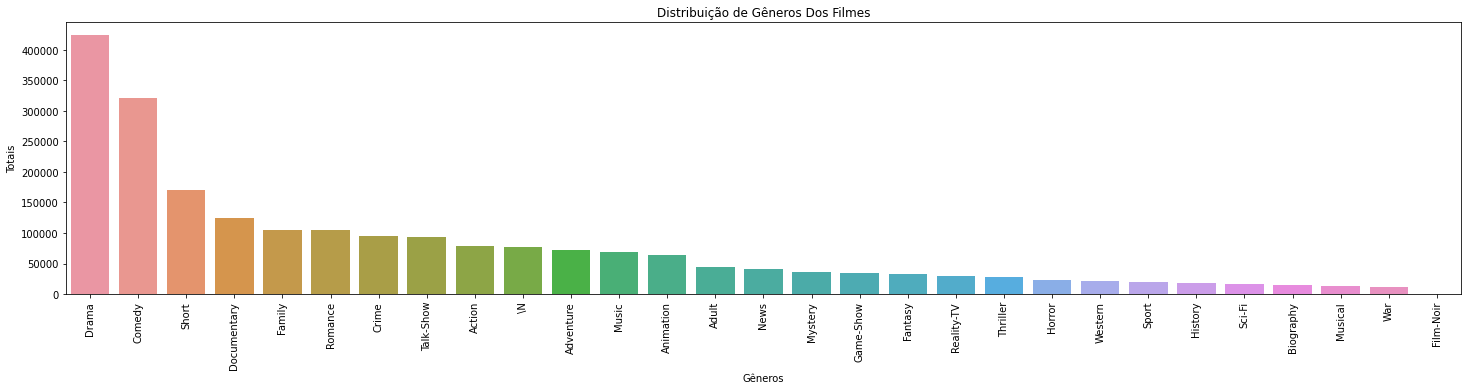

In [12]:
genres = data['genres'].dropna()
genres_list = [str(genres_str).split(',') for genres_str in genres.unique().tolist()]
genres_list = [genres.strip() for genres in list(set(sum(genres_list,[])))]

tmp = data[['primaryTitle','genres']]
for genres in genres_list:
    tmp[genres] = tmp['genres'].apply(lambda x:1 if genres in str(x) else 0)
tmp = tmp[genres_list].sum().reset_index().sort_values(0,ascending=False)
tmp.columns = ['Gêneros','Totais']

plt.figure(figsize=(25,5))
sns.barplot(data=tmp,x='Gêneros',y='Totais')
plt.title(f'Distribuição de Gêneros Dos Filmes')
plt.xticks(rotation=90)
plt.show()

# Explorando uma nuvem de palavras que representa os gêneros mais recorrentes dos filmes
*   Explicação: Montar um nuvem de palavras para explorar os tipos de gêneros presentes nos dados coletados do IMDb
*   Motivação: Ter noção dos gêneros presentes nos dados coletados do IMDb
*   Análise/insights: Usar a forma textual com cores e disposições diferentes facilita na compreensão dos dados apresentados

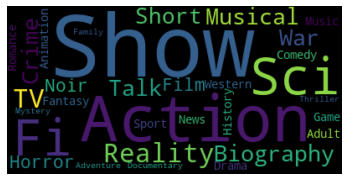

In [13]:
df_genres = data['genres'].dropna()
genres_list = [str(genres_str).split(',') for genres_str in df_genres.unique().tolist()]
genres_list = [genres.strip() for genres in list(set(sum(genres_list,[])))]
genres_list.remove("\\N")
text = ""
for g in genres_list:
  text = text + " " + g
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Matrix Plot - Para explorar valores não preenchidos, o gráfico é uniforme pois não existe correlação de valores nulos e vazios


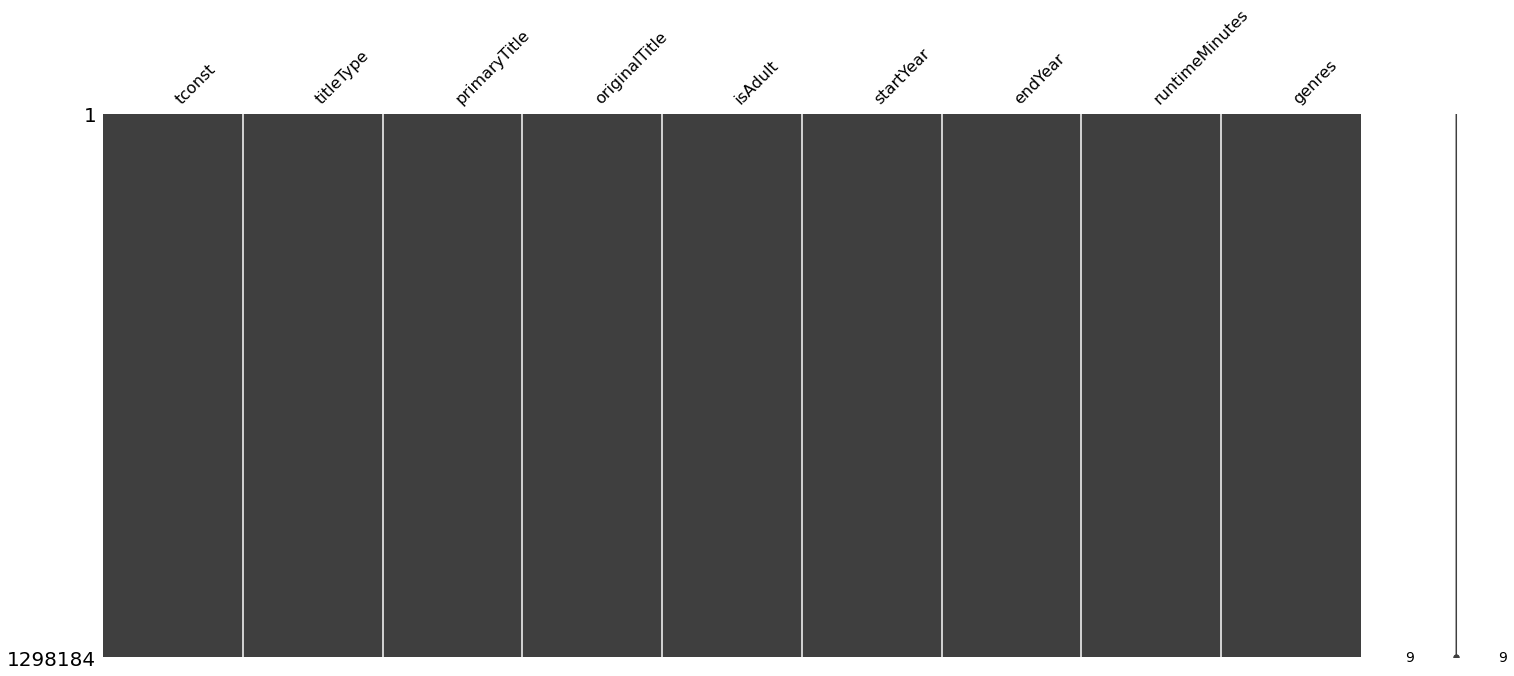

In [14]:
msno.matrix(data)

# Heatmap - Usado para identificar se existe uma relação na presença de valores nulos entre cada uma das colunas. Como a base de dados foi tratada o gráfico é  uniforme 



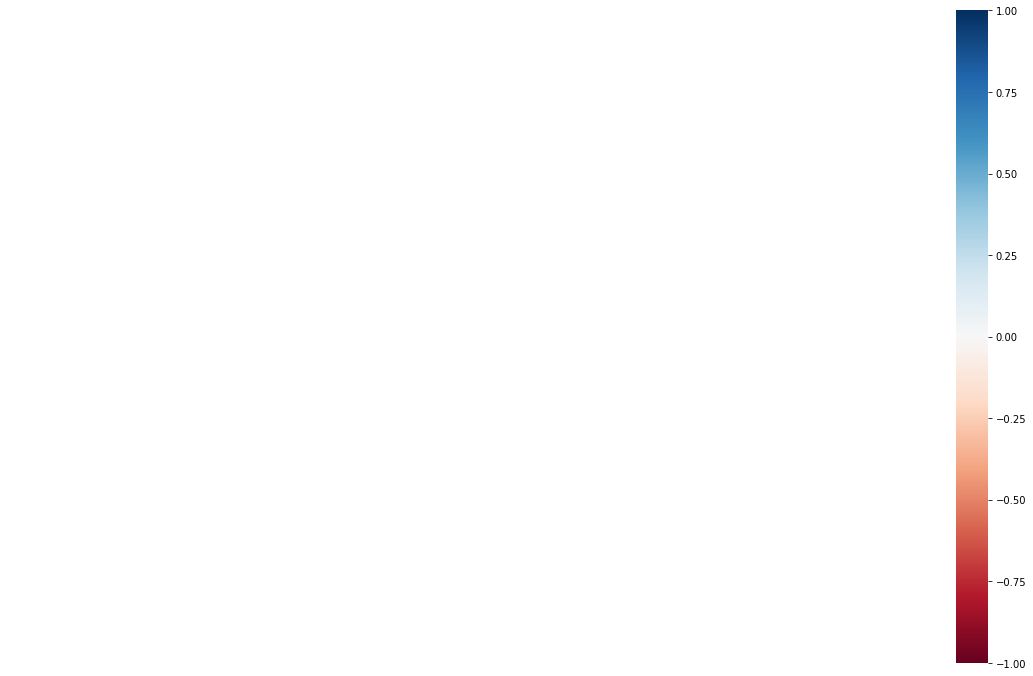

In [15]:
msno.heatmap(df)

# Nesse gráfico de dispersão podemos ver a relação do tempo de duração dos filmes no decorrer do tempo, como é mostrado no gráfico abaixo podemos notar que os filmes vão ficando com maior duração durante os anos.

*   Explicação: Ver como o tempo de
*   Motivação: Ver como o tempo influencia no tempo de duração das midias
*   Análise/insights: A medida que os anos vão passando o tempo de duração dos filmes vão aumentando e começam a se estabilizar em algo em torno de 90 minutos. Talves por uma questão de tempo de retenção da atenção dos espectadores.

In [16]:
df_correlacao_ano_tempo = data[['startYear', 'runtimeMinutes','titleType']].dropna()
# removendo valores com \N
df_correlacao_ano_tempo.drop(df_correlacao_ano_tempo[df_correlacao_ano_tempo['runtimeMinutes'] == '\\N'].index, inplace = True)
# removendo anos com \N
df_correlacao_ano_tempo.drop(df_correlacao_ano_tempo[df_correlacao_ano_tempo['startYear'] == '\\N'].index, inplace = True)
# removendo todos os valores que nao sejam filmes
df_correlacao_ano_tempo.drop(df_correlacao_ano_tempo[df_correlacao_ano_tempo['titleType'] != 'movie'].index, inplace = True)
# transformando os valores das colunas de ano e tempo de duração em inteiros para ser possivel agrupar
df_correlacao_ano_tempo['startYear'] = df_correlacao_ano_tempo['startYear'].astype(int)
df_correlacao_ano_tempo['runtimeMinutes'] = df_correlacao_ano_tempo['runtimeMinutes'].astype(int)
# agrupando a data e criando uma média do tempo de duração
df_correlacao_ano_tempo = df_correlacao_ano_tempo.groupby(['startYear'])['runtimeMinutes'].mean().reset_index()
# plotando o gráfico de dispersão 
fig=px.scatter(df_correlacao_ano_tempo, x = 'startYear', opacity=0.9, y = 'runtimeMinutes', log_x = True, width = 800)
fig.update_layout(title = 'Tempo de Duração X Ano de Início dos Filmes')
fig.update_xaxes(title = 'Ano de Inicio')
fig.update_yaxes(title = 'Tempo de Duração')
fig.show()


##Quanto tempo em média dura uma serie ?

*   Explicação: Tempo de duração de uma serie
*   Motivação: Entender quanto tempo as series duram, desde o lançamento ate a data de encerramento
*   Análise/insights: O resultado apresentando é de 3 anos em média. 

In [53]:

conditionToEndYear = (data['endYear'] != '\\N') & (data['endYear'] != 'NaN') & (data['endYear'] != 'None') & (data['endYear'] != '')
conditionToStartYear = (data['startYear'] != '\\N') & (data['startYear'] != 'NaN') & (data['startYear'] != 'None') & (data['startYear'] != '')
conditionTitleType = (data['titleType'] != '\\N') & (data['titleType'] != 'NaN') & (data['titleType'] != 'None') & (data['titleType'] != '')
conditionOnlySeries = (data['titleType'] == 'tvSeries')

df_filtrado = data[(conditionToEndYear) & (conditionToStartYear) & (conditionTitleType) & (conditionOnlySeries)]
df_filtrado['anos_duracao'] = (df_filtrado['endYear'].astype(int) - df_filtrado['startYear'].astype(int))
df_f = df_filtrado['anos_duracao'].mean()
df_f



3.163005665440811

## Quais são os top 10 títulos mais longos ?

In [18]:
df['runtimeMinutes'] = np.where(df['runtimeMinutes']=='\\N',0,df['runtimeMinutes'])
df['runtimeMinutes'] = df['runtimeMinutes'].apply(pd.to_numeric,errors = 'ignore')
longmins = df.nlargest(10,'runtimeMinutes')['primaryTitle']

x = 'Totais'
y = 'top 10 títulos mais longos'
fig = px.bar(x = [i for i in sorted(longmins.index)],y = [i for i in sorted(longmins)],color = [i for i in sorted(longmins)],template='plotly_dark')
fig.update_layout(xaxis_title = f'{str(x).title()}',yaxis_title = f'{str(y).title()}',title = f'Distribuição dos {str(x).title()} & {str(y).title()}')
fig.show()

##Qual o tempo média de duração das series e minisséries ?
#### O gráfico abaixo mostra a diferença de tempo da data de início e fim dos tipos tvMiniSeries e tvSeries, mostrando o resultado em anos

*   Explicação: Podemos analisar a diferença de tempo de duração das tvMiniSeries e tvSeries
*   Motivação: Entender a diferença das duas categorias
*   Análise/insights: tvMiniSeries possuem menos capitulos e personagens, já as series possuem capitulos(episodios) e duram mais tempo.


In [19]:

conditionToEndYear = (data['endYear'] != '\\N') & (data['endYear'] != 'NaN') & (data['endYear'] != 'None') & (data['endYear'] != '')
conditionToStartYear = (data['startYear'] != '\\N') & (data['startYear'] != 'NaN') & (data['startYear'] != 'None') & (data['startYear'] != '')
conditionTitleType = (data['titleType'] != '\\N') & (data['titleType'] != 'NaN') & (data['titleType'] != 'None') & (data['titleType'] != '')
df_filtrado = data[(conditionToEndYear) & (conditionToStartYear) & (conditionTitleType) ]
df_filtrado['anos_duracao'] = (df_filtrado['endYear'].astype(int) - df_filtrado['startYear'].astype(int))
df_filtrado['anos_duracao'].mean()
df_filtrado = df_filtrado.groupby(['titleType'])['anos_duracao'].mean().reset_index()
df_filtrado
fig = px.funnel(df_filtrado, x='anos_duracao', y='titleType')
fig.show()

fig = px.pie(df_filtrado, values='anos_duracao', names='titleType')
fig.show()

##Explicação: Mapa de calor que indica a proporção de filmes adultos vs filmes amigáveis para a família

*   Motivação: Entender a diferença das duas categorias
*   Análise/insights: Filmes dedicados a toda a família são mais avaliados e tem mais volume

In [20]:
isadult = Counter(data.isAdult)
x = 'Amigável para a família v/s Adulto '
y = 'Totais'
fig = px.bar(x = [i[0] for i in isadult.items()],y = [i[1] for i in isadult.items()],color = [i[1] for i in isadult.items()],template='plotly_dark')
fig.update_layout(xaxis_title = f'{str(x).title()}',yaxis_title = f'{str(y).title()}',title = f'{str(x).title()} & {str(y).title()}',height = 500,width = 700)
fig.show()

## Gráfico de bolhas com indicador de calor para demonstrar o tempo de duração das series e mini-series ao longo dos anos



In [38]:
# Filtrando o dataset para remover os valores inválidos
conditionToEndYear = (data['endYear'] != '\\N') & (data['endYear'] != 'NaN') & (data['endYear'] != 'None') & (data['endYear'] != '')
conditionToStartYear = (data['startYear'] != '\\N') & (data['startYear'] != 'NaN') & (data['startYear'] != 'None') & (data['startYear'] != '')
conditionTitleType = (data['titleType'] != '\\N') & (data['titleType'] != 'NaN') & (data['titleType'] != 'None') & (data['titleType'] != '')
conditionRuntimeMinutes = (data['runtimeMinutes'] != '\\N') & (data['runtimeMinutes'] != 'NaN') & (data['runtimeMinutes'] != 'None') & (data['runtimeMinutes'] != '')
# Aplicando os filtro
df_filtrado = data[(conditionToEndYear) & (conditionToStartYear) & (conditionTitleType) & (conditionRuntimeMinutes)]
df_filtrado = df_filtrado.groupby(['startYear', 'titleType'])['runtimeMinutes'].mean().reset_index()
df_filtrado.columns = ['Ano de Início', 'Tipo de Título', 'Tempo de Duração - Minutos']

# Montando o gráfico
fig = px.scatter(df_filtrado, x="Ano de Início", y="Tempo de Duração - Minutos", size="Tempo de Duração - Minutos", color="Tempo de Duração - Minutos", hover_name="Tipo de Título", log_x=True, size_max=60)
fig.show()

In [59]:
!jupyter nbconvert --to html TrabalhoFinal.ipynb --template full

[NbConvertApp] Converting notebook TrabalhoFinal.ipynb to html
[NbConvertApp] Writing 593974 bytes to TrabalhoFinal.html
